<a href="https://colab.research.google.com/github/steve-shim/dlgom/blob/main/deeplearning/CNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
x = np.array([1,2,3,0,0,1,2,3,3,0,1,2,2,3,0,1]).reshape(4,4)
filter = np.array([2,0,1,0,1,2,1,0,2]).reshape(3,3)

dst = np.zeros((len(x)-len(filter)+1, len(x)-len(filter)+1))
for i in range(len(x)-len(filter)+1):
  for j in range(len(x)-len(filter)+1):
    dst[i,j] = np.sum(x[i:i+len(filter),j:len(filter)+j]*filter)

print(dst)

[[15. 16.]
 [ 6. 15.]]


In [69]:
dst = np.zeros((len(x)-len(filter)+1, len(x)-len(filter)+1))
for i in range(len(filter)-1):
  for j in range(len(filter)-1):
    dst[j,i] = np.sum(x[i:i+len(filter),j:len(filter)+j]*filter)

print(dst)

[[15.  6.]
 [16. 15.]]


In [79]:
import numpy as np

x = np.array([1,2,3,0,0,1,2,3,3,0,1,2,2,3,0,1]).reshape(4,4)
x

array([[1, 2, 3, 0],
       [0, 1, 2, 3],
       [3, 0, 1, 2],
       [2, 3, 0, 1]])

In [80]:
filter = np.array([2,0,1,0,1,2,1,0,2]).reshape(3,3)
filter

array([[2, 0, 1],
       [0, 1, 2],
       [1, 0, 2]])

In [81]:
x_pad = np.pad(x, pad_width=1, mode='constant', constant_values=0)
x_pad

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0, 0],
       [0, 0, 1, 2, 3, 0],
       [0, 3, 0, 1, 2, 0],
       [0, 2, 3, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

패딩이 없을 경우 

4x4 이미지에 3x3 필터를 적용하면 2x2 feature map 이 나온다

In [82]:
x = np.array([1,2,3,0,0,1,2,3,3,0,1,2,2,3,0,1]).reshape(4,4)
filter = np.array([2,0,1,0,1,2,1,0,2]).reshape(3,3)

dst = np.zeros((len(x)-len(filter)+1, len(x)-len(filter)+1))
for i in range(len(x)-len(filter)+1):
  for j in range(len(x)-len(filter)+1):
    dst[i,j] = np.sum(x[i:i+len(filter),j:len(filter)+j]*filter)

print(dst)

[[15. 16.]
 [ 6. 15.]]


zero padding 이 있을 경우 

4x4 이미지에 3x3 필터를 적용하면 4x4 feature map 이 나온다

필터의 크기가 3x3 이므로 원본의 사이즈를 유지하기 위해서는 pad_width=1 을 해야한다

필터 사이즈를 F 라고 했을 때, (F-1)/2 만큼의 패딩을 둘러주면 된다

In [83]:
import numpy as np

x = np.array([1,2,3,0,0,1,2,3,3,0,1,2,2,3,0,1]).reshape(4,4)
x = np.pad(x, pad_width=1, mode='constant', constant_values=0)
x

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0, 0],
       [0, 0, 1, 2, 3, 0],
       [0, 3, 0, 1, 2, 0],
       [0, 2, 3, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [84]:
filter = np.array([2,0,1,0,1,2,1,0,2]).reshape(3,3)
filter

array([[2, 0, 1],
       [0, 1, 2],
       [1, 0, 2]])

In [85]:
dst = np.zeros((len(x)-len(filter)+1, len(x)-len(filter)+1))
for i in range(len(x)-len(filter)+1):
  for j in range(len(x)-len(filter)+1):
    dst[i,j] = np.sum(x[i:i+len(filter),j:len(filter)+j]*filter)

print(dst)

[[ 7. 12. 10.  2.]
 [ 4. 15. 16. 10.]
 [10.  6. 15.  6.]
 [ 8. 10.  4.  3.]]


텐서플로우로 convolution 층을 구성

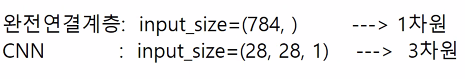

In [79]:
import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data                                                                            # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten  # 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈

tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')  # mnist 데이터 로드
    
# 2. 정규화 진행  
x_train = x_train.reshape(-1, 28 * 28, 1) 
x_test = x_test.reshape(-1, 28 * 28, 1)

x_train = x_train / 255
x_test = x_test / 255

# 3. 정답 데이터를 준비한다. 
# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

# 4. 모델을 구성합니다. 3층 신경망으로 구성
model = Sequential()
model.add(Conv2D(100, kernel_size=(5,5), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation = 'sigmoid'))  # 1층
model.add(Dense(50, activation = 'sigmoid') ) # 2층 은닉층 
model.add(Dense(10, activation = 'softmax'))  # 3층 출력층 
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 100)       2600      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 100)       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 19600)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 50)                980050    
_________________________________________________________________
dense_42 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                510       
Total params: 985,710
Trainable params: 985,710
Non-trainable params: 0
_______________________________________________

In [ ]:
import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten  # 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈

tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')  # mnist 데이터 로드
    
# 2. 정규화 진행  
x_train = x_train.reshape(-1, 28 * 28, 1) 
x_test = x_test.reshape(-1, 28 * 28, 1)

x_train = x_train / 255
x_test = x_test / 255

# 3. 정답 데이터를 준비한다. 
# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

# 4. 모델을 구성합니다. 3층 신경망으로 구성
model = Sequential()
model.add(Conv2D(100, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(50, activation = 'sigmoid'))  # 1층
model.add(Dense(50, activation = 'sigmoid') ) # 2층 은닉층 
model.add(Dense(10, activation = 'softmax'))  # 3층 출력층 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 100)       2600      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                720050    
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                510       
Total params: 725,710
Trainable params: 725,710
Non-trainable params: 0
________________________________________________

Epoch 1/30
480/480 [==============================] - 53s 108ms/step - loss: 2.3027 - acc: 0.1113 - val_loss: 2.2835 - val_acc: 0.1060
Epoch 2/30
480/480 [==============================] - 52s 107ms/step - loss: 2.2624 - acc: 0.1838 - val_loss: 2.2302 - val_acc: 0.2637
Epoch 3/30
480/480 [==============================] - 52s 108ms/step - loss: 2.1611 - acc: 0.4536 - val_loss: 2.0571 - val_acc: 0.4717
Epoch 4/30
480/480 [==============================] - 51s 107ms/step - loss: 1.9098 - acc: 0.5644 - val_loss: 1.7392 - val_acc: 0.6398
Epoch 5/30
480/480 [==============================] - 51s 106ms/step - loss: 1.5982 - acc: 0.6575 - val_loss: 1.4390 - val_acc: 0.7290
Epoch 6/30
480/480 [==============================] - 51s 106ms/step - loss: 1.3296 - acc: 0.7399 - val_loss: 1.1924 - val_acc: 0.7884
Epoch 7/30
480/480 [==============================] - 51s 106ms/step - loss: 1.1127 - acc: 0.7921 - val_loss: 0.9955 - val_acc: 0.8266
Epoch 8/30
480/480 [==============================] - 5

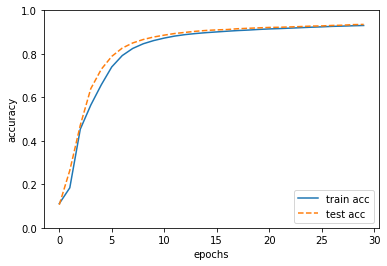

In [77]:
import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten  # 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈

tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')  # mnist 데이터 로드
    
# 2. 정규화 진행  
x_train = x_train.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train / 255
x_test = x_test / 255

# 3. 정답 데이터를 준비한다. 
# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

# 4. 모델을 구성합니다. 3층 신경망으로 구성
model = Sequential()
model.add(Conv2D(100, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(50, activation = 'sigmoid'))  # 1층
model.add(Dense(50, activation = 'sigmoid') ) # 2층 은닉층 
model.add(Dense(10, activation = 'softmax'))  # 3층 출력층 

# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )
model.compile(optimizer='SGD', 
                     loss = 'categorical_crossentropy', 
                     metrics=['acc'])  # 학습과정에서 정확도를 보려고 

#6. 모델을 훈련시킵니다. 

history = model.fit(x_train, y_train, 
                         epochs = 30,  # 30에폭
                         batch_size = 100,
                         validation_split=0.2 )

# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)
model.evaluate(x_test, y_test)

train_acc_list=history.history['acc']
train_acc_list

test_acc_list=history.history['val_acc']
test_acc_list

import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Fashion Mnist 데이터로 CNN 적용하기

In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


데이터 정규화

In [3]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0

In [4]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)
print(train_scaled.shape)
print(val_scaled.shape)
print(train_target.shape)
print(val_target.shape)

# y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
# y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000,)
(12000,)


모델 생성

In [5]:
# 첫번째 합성곱
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2))

# 두번째 합성곱-풀링층 추가
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2))

# 3차원 특성맵을 펼친다
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()
# 학습되는 모델파라미터 갯수
# 3x3x1x32 + 32 = 320
# 3x3x32x64 + 64 = 18496
# 3136x100 + 100 = 313700
# 100x10 + 10 = 1010

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

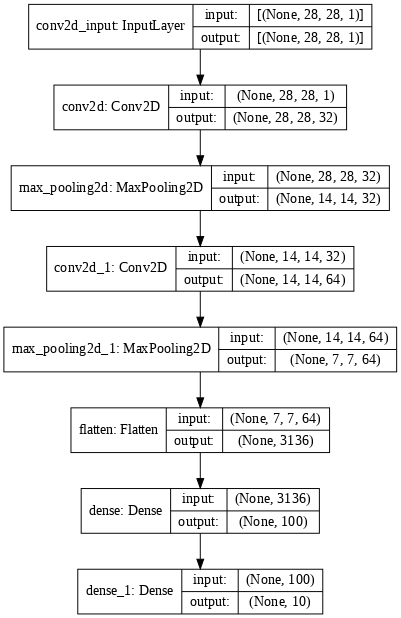

In [7]:
keras.utils.plot_model(model, show_shapes=True,
                       to_file='cnn-architecture.png', dpi=70)

In [8]:
print(train_target[:5])

[7 3 5 8 6]


save_best_only=True -> 훈련이 조기종료되기전 최적의 가중치를 저장한 모델을 저장한다

restore_best_weights=True -> 현재 model 객체가 최적의 모델 파라미터로 복원되어 있다

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 37s 6ms/step - loss: 0.4284 - accuracy: 0.8435 - val_loss: 0.3081 - val_accuracy: 0.8877
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2845 - accuracy: 0.8971 - val_loss: 0.3055 - val_accuracy: 0.8877
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2379 - accuracy: 0.9133 - val_loss: 0.2695 - val_accuracy: 0.8992
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2064 - accuracy: 0.9241 - val_loss: 0.2369 - val_accuracy: 0.9129
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1789 - accuracy: 0.9340 - val_loss: 0.2357 - val_accuracy: 0.9150
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1559 - accuracy: 0.9412 - val_loss: 0.2383 - val_accuracy: 0.9131
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1341 - accuracy: 0.9495 - val_loss: 0.2439 - val_accuracy

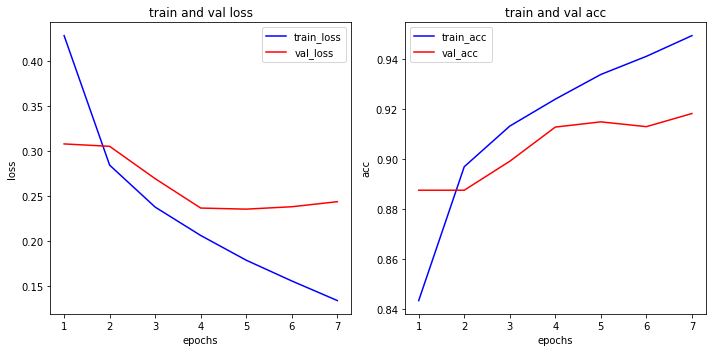

In [36]:
import matplotlib.pyplot as plt

his_dict = history.history # 딕셔너리 
loss = his_dict['loss'] # 리스트
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend() # label 적어준 값들 출력

acc = his_dict['accuracy'] # 리스트
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend() # label 에 적어준 값들 출력

plt.tight_layout()
plt.show()

In [10]:
new_model = keras.models.load_model('best-cnn-model.h5')
new_model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9183


[0.24392610788345337, 0.9183333516120911]

In [12]:
val_scaled[0].shape

(28, 28, 1)

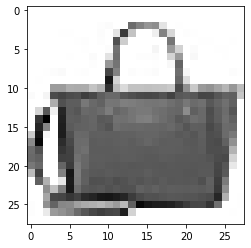

In [20]:
import matplotlib.pyplot as plt

# 흑백이미지를 시각화 할때는 3차원이 아니라 2차원 형태여야 시각화 가능하다
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [23]:
val_scaled[0:1].shape

(1, 28, 28, 1)

케라스의 fit(), predict(), evaluate() 메서드는 모두 입력의 첫 번째 차원이 배치 차원일 것으로 기대합니다. 

따라서 샘플 하나를 예측할 때 (28,28,1)이 아니라 (1,28,28,1) 크기를 전달해야 합니다.

슬라이싱은 인덱싱과 다르게 차원이 유지된다.

In [62]:
preds = new_model.predict(val_scaled[0:1])
preds

array([[3.8856277e-15, 1.4456260e-21, 1.9072461e-15, 7.9327071e-17,
        4.5062661e-14, 9.6310039e-16, 1.7515281e-17, 2.4395934e-13,
        1.0000000e+00, 6.4144786e-17]], dtype=float32)

In [63]:
np.argmax(preds,axis=1)

array([8])

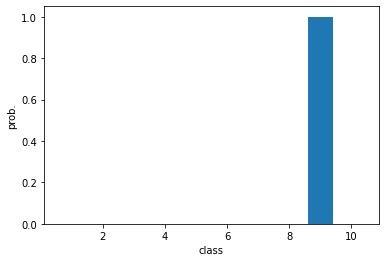

In [64]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [65]:
target_dict = {
 0: 'T-shirt/top (티셔츠)',
 1: 'Trouser (바지)',
 2: 'Pullover (스웨터)',
 3: 'Dress (드레스)',
 4: 'Coat (코트)',
 5: 'Sandal (샌달)',
 6: 'Shirt (셔츠)',
 7: 'Sneaker (스니커즈)',
 8: 'Bag (가방)',
 9: 'Ankle boot (앵클 부츠)',
}


In [66]:
import numpy as np
target_dict[np.argmax(preds, axis=1)[0]]

'Bag (가방)'

In [67]:
np.argmax(preds, axis=1)

array([8])

테스트 데이터로 최종 테스트

In [72]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [73]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2562 - accuracy: 0.9078


[0.2561943829059601, 0.907800018787384]

BatchNormalization 와 Dropout 을 통한 성능 개선

In [74]:
# 첫번째 합성곱
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2))

# 두번째 합성곱-풀링층 추가
model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2))

# 3차원 특성맵을 펼친다
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

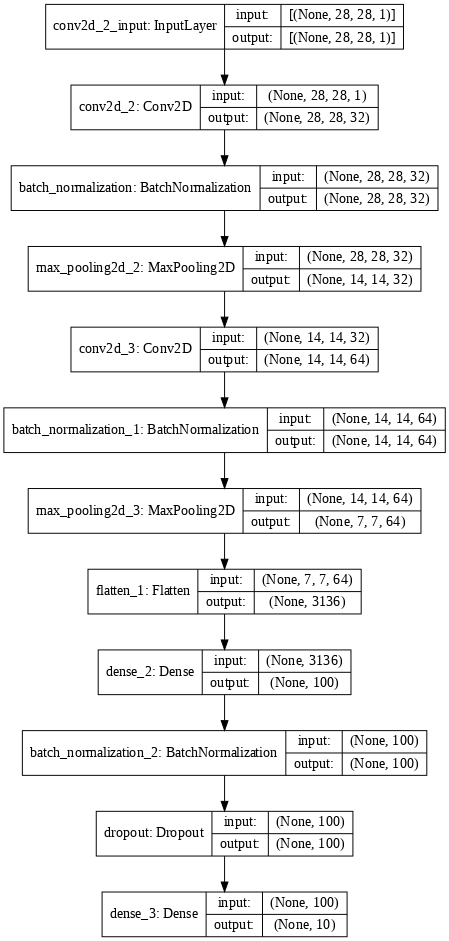

In [75]:
keras.utils.plot_model(model2, show_shapes=True,
                       to_file='cnn-architecture.png', dpi=70)

In [76]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model2.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history2 = model2.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4264 - accuracy: 0.8526 - val_loss: 0.3090 - val_accuracy: 0.8842
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2915 - accuracy: 0.8970 - val_loss: 0.3341 - val_accuracy: 0.9054
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2473 - accuracy: 0.9126 - val_loss: 0.2508 - val_accuracy: 0.9071
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2232 - accuracy: 0.9197 - val_loss: 0.2261 - val_accuracy: 0.9170
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2020 - accuracy: 0.9275 - val_loss: 0.2460 - val_accuracy: 0.9112
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1868 - accuracy: 0.9323 - val_loss: 0.2299 - val_accuracy: 0.9178


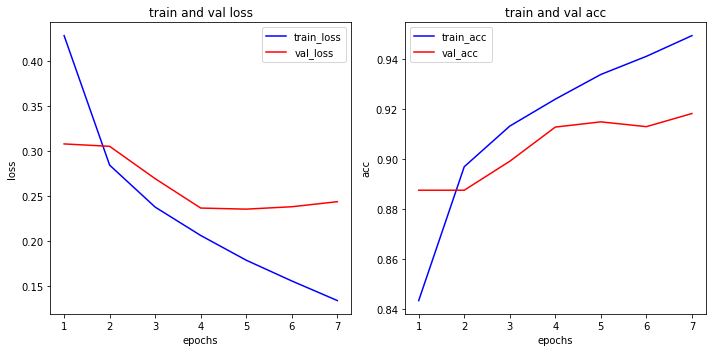

In [77]:
import matplotlib.pyplot as plt

his_dict = history.history # 딕셔너리 
loss = his_dict['loss'] # 리스트
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend() # label 적어준 값들 출력

acc = his_dict['accuracy'] # 리스트
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend() # label 에 적어준 값들 출력

plt.tight_layout()
plt.show()

In [78]:
model2.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2424 - accuracy: 0.9128


[0.2424209713935852, 0.9128000140190125]